Task: Predicting Production (Production, measured in tons):

In [1]:
#Predicting Production (Production, measured in tons):
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'path_to_your_dataset.csv' with the path to your actual dataset)
data = pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Final/DS_Crop_Production_Prediction/FAOSTAT_data.xlsx')

# Filter the dataset for the specific crop and region
crop = 'Almonds, in shell'  # Specify the crop
region = 'Afghanistan'      # Specify the region
filtered_data = data[(data['Item'] == crop) & (data['Area'] == region) & (data['Element'] == 'Production')]

# Prepare the data for modeling
X = filtered_data[['Year']]  # Feature: Year
y = filtered_data['Value']   # Target: Production Value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Evaluation:\nMean Squared Error: {mse:.2f}\nR-Squared: {r2:.2f}")

# Predict the production for a specific year
year_to_predict = 2024  # Change the year to your desired prediction year
predicted_production = model.predict([[year_to_predict]])
print(f"The predicted production for {crop} in {region} for the year {year_to_predict} is {predicted_production[0]:.2f} tons.")

Model Evaluation:
Mean Squared Error: 99139004.16
R-Squared: nan
The predicted production for Almonds, in shell in Afghanistan for the year 2024 is 78000.31 tons.


D:\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
# Import required libraries
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Sample dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics calculation
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append results
    results.append((name, r2, mse, mae))

# Display results
print("Model Performance Comparison:")
print("{:<25} {:<10} {:<10} {:<10}".format("Model", "R²", "MSE", "MAE"))
for result in results:
    print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f}".format(*result))

Model Performance Comparison:
Model                     R²         MSE        MAE       
Linear Regression         1.0000     0.0380     0.1555    
Random Forest             0.8454     2608.6224  40.2225   
Support Vector Regressor  0.2437     12758.8027 89.7037   
Neural Network            0.9993     11.1992    2.3578    


D:\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


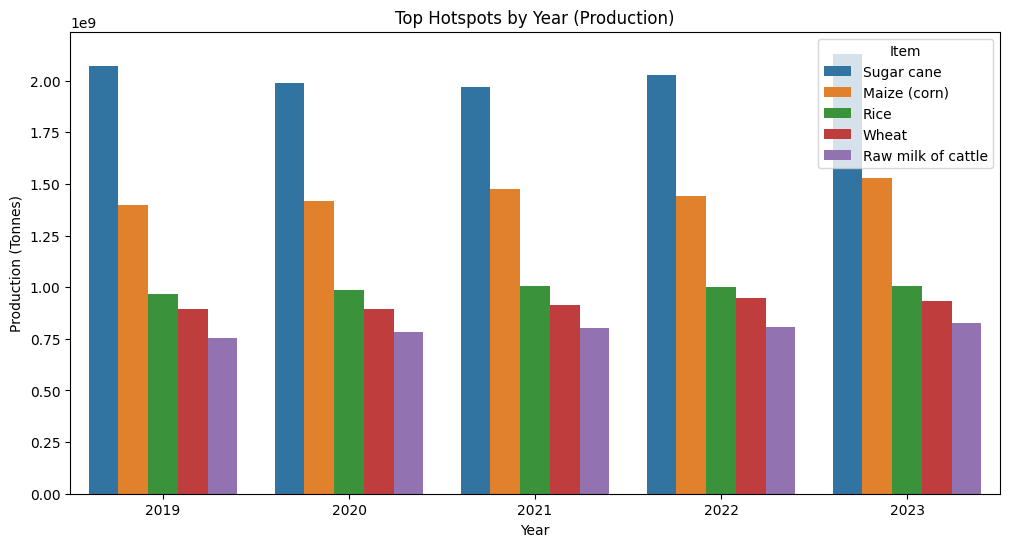

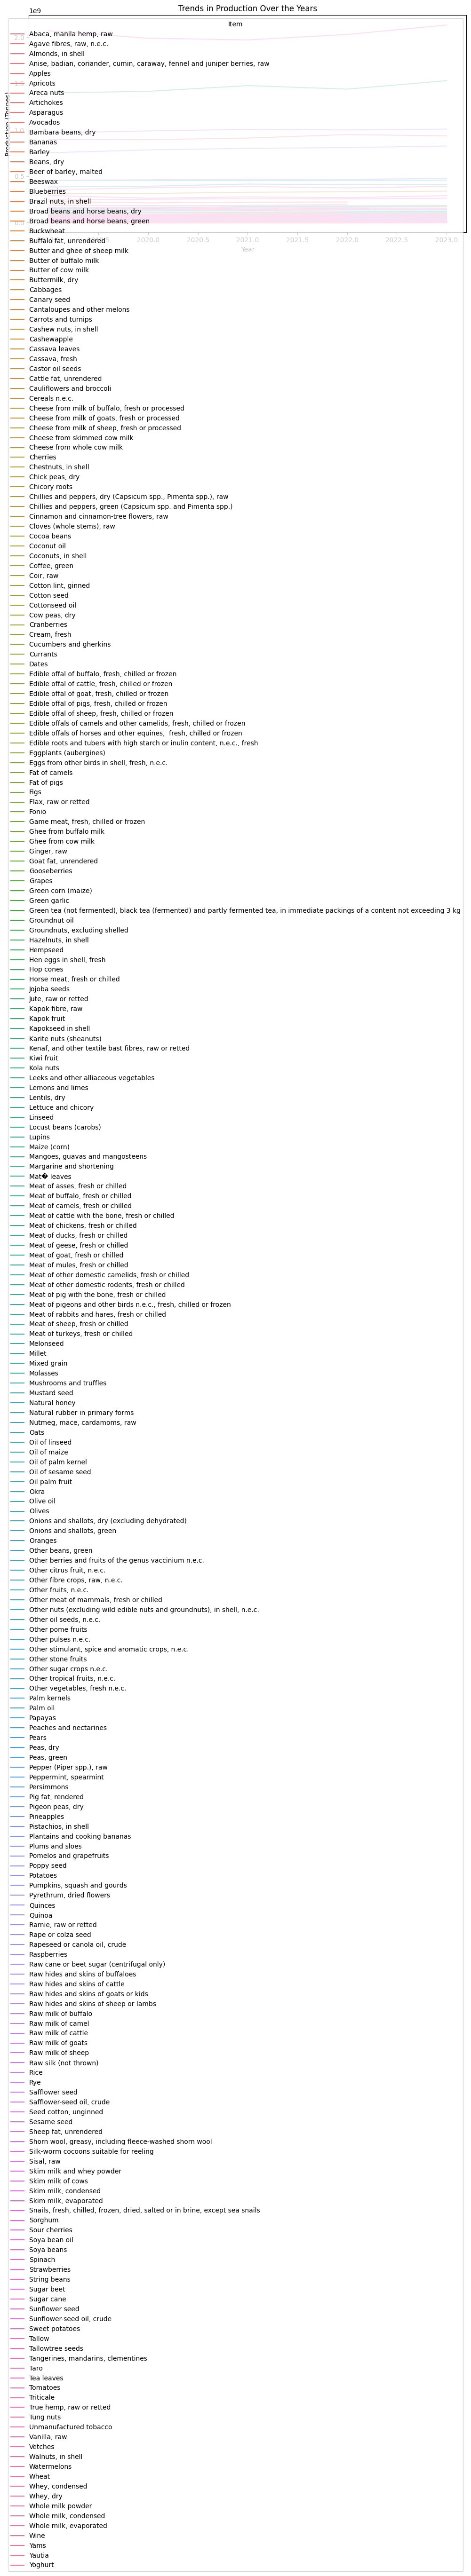

Hotspots (Top production items by year):
      Year                Item         Value
1222  2023          Sugar cane  2.130787e+09
230   2019          Sugar cane  2.069208e+09
1004  2022          Sugar cane  2.029398e+09
488   2020          Sugar cane  1.988992e+09
746   2021          Sugar cane  1.970682e+09
1124  2023        Maize (corn)  1.530644e+09
629   2021        Maize (corn)  1.477452e+09
887   2022        Maize (corn)  1.439548e+09
371   2020        Maize (corn)  1.415798e+09
113   2019        Maize (corn)  1.397878e+09
1205  2023                Rice  1.008064e+09
723   2021                Rice  1.005226e+09
981   2022                Rice  9.990044e+08
465   2020                Rice  9.887249e+08
207   2019                Rice  9.668931e+08
1022  2022               Wheat  9.491104e+08
1238  2023               Wheat  9.355714e+08
764   2021               Wheat  9.115915e+08
248   2019               Wheat  8.968724e+08
506   2020               Wheat  8.944005e+08
1202  2023  Ra

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Replace 'data.csv' with your file name
data = pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Final/DS_Crop_Production_Prediction/FAOSTAT_data.xlsx')

# Example: Data structure from uploaded image
# Columns: ['Year', 'Item', 'Value', 'Unit', 'Element', 'Area']

# Preprocessing: Filter relevant columns and items
filtered_data = data[(data['Element'] == 'Production') & (data['Unit'] == 't')]

# Insights: Identify hotspots (highest production values per year)
hotspots = filtered_data.groupby(['Year', 'Item'])['Value'].sum().reset_index()
top_hotspots = hotspots.sort_values(by='Value', ascending=False).groupby('Year').head(5)

# Trends: Analyze year-over-year production for key items
trends = filtered_data.groupby(['Year', 'Item'])['Value'].sum().reset_index()

# Visualize hotspots
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Value', hue='Item', data=top_hotspots)
plt.title('Top Hotspots by Year (Production)')
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.legend(title='Item')
plt.show()

# Visualize trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Item', data=trends)
plt.title('Trends in Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.legend(title='Item')
plt.show()

# Actionable insights
print("Hotspots (Top production items by year):")
print(top_hotspots)

print("\nYear-over-Year Trends:")
print(trends)